# Pytrad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path+"\\DataPreprocessing")

## Data Preprocessing

In [2]:
data_dir = "C:/Users/diego/iCloudDrive/Documents/MBZUAI Sem/Semester 2/ML703 Probabilistic and Statistical Inference/Project/JN/Datasets/"

company = pd.read_csv(data_dir + "Company.csv")
companyValues = pd.read_csv(data_dir + "CompanyValues.csv")
companyTweet = pd.read_csv(data_dir + "Company_Tweet.csv")
tweet = pd.read_csv(data_dir + "Tweet.csv")
tweet = tweet.merge(companyTweet, on="tweet_id", how='inner')

In [3]:
print(f"Stocks from {company.ticker_symbol.unique()}")

selected_stock = 'TSLA'
print(f"Stock selected: {selected_stock}")
companyValuesSub = companyValues[companyValues.ticker_symbol == selected_stock]
tweetSub = tweet[tweet.ticker_symbol == selected_stock]

Stocks from ['AAPL' 'GOOG' 'GOOGL' 'AMZN' 'TSLA' 'MSFT']
Stock selected: TSLA


In [4]:
print(f"Company values: \n{companyValuesSub.head(3)}")
print(f"Company tweets: \n{tweetSub.head(3)}")

Company values: 
      ticker_symbol    day_date  close_value    volume  open_value  \
14463          TSLA  2020-05-29       835.00  11812490      808.75   
14464          TSLA  2020-05-28       805.81   7275774      813.51   
14465          TSLA  2020-05-27       820.23  11549530      820.86   

       high_value  low_value  
14463      835.00     804.21  
14464      824.75     801.69  
14465      827.71     785.00  
Company tweets: 
             tweet_id         writer   post_date  \
3  550442977802207232   ShowDreamCar  1420070807   
5  550443807834402816   i_Know_First  1420071005   
7  550443808606126081  aaplstocknews  1420071005   

                                                body  comment_num  \
3  $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
5  Swing Trading: Up To 8.91% Return In 14 Days h...            0   
7  Swing Trading: Up To 8.91% Return In 14 Days h...            0   

   retweet_num  like_num ticker_symbol  
3            0         1          

## One Company Analysis

### Tweet data preprocessing

In [5]:
from data import set_datetime, detrend_ts

tweetSub['date'] = set_datetime(tweetSub.post_date)

tweetSubMetrics = tweetSub[['date', 'comment_num', 'retweet_num', 'like_num']]
tweetSubMetrics = tweetSubMetrics.groupby(["date"]).sum()
tweetSubMetrics2019 = tweetSubMetrics[(tweetSubMetrics.index >= pd.to_datetime("2018/12/25")) \
    & (tweetSubMetrics.index <= pd.to_datetime("2019/12/31"))]

tweetSubMetrics2019.head(3)

C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,comment_num,retweet_num,like_num
date,,,
2018-12-25,432,354,3395
2018-12-26,602,815,5048
2018-12-27,778,709,5513


In [6]:
tweetSubMetrics2019['log_retweet_num'] = np.log(tweetSubMetrics2019['retweet_num'])
tweetSubMetrics2019['log_comment_num'] = np.log(tweetSubMetrics2019['comment_num'])

tweetSubMetrics2019['detrended_log_comment_num'] = detrend_ts(tweetSubMetrics2019.log_comment_num)

tweetSubMetrics2019 = tweetSubMetrics2019[-365:]

C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

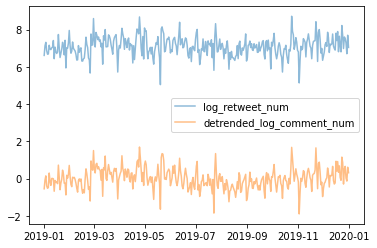

In [7]:
plt.plot(tweetSubMetrics2019.log_retweet_num, alpha=0.5, label="log_retweet_num")
plt.plot(tweetSubMetrics2019.detrended_log_comment_num, alpha=0.5, label="detrended_log_comment_num")
plt.legend()

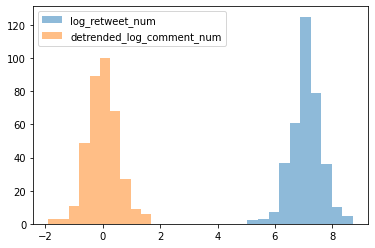

In [8]:
plt.hist(tweetSubMetrics2019.log_retweet_num, alpha=0.5, label="log_retweet_num")
plt.hist(tweetSubMetrics2019.detrended_log_comment_num, alpha=0.5, label="detrended_log_comment_num")
plt.legend()

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(tweetSubMetrics2019.log_retweet_num)
print('Log Retweet Number test:')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

result = adfuller(tweetSubMetrics2019.detrended_log_comment_num)
print('Detrended Log Tweet Comment Number test:')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Log Retweet Number test:
ADF Statistic: -3.677427
p-value: 0.004442
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
Detrended Log Tweet Comment Number test:
ADF Statistic: -2.804106
p-value: 0.057690
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


### Value data preprocessing

In [10]:
companyValuesSub['date'] = pd.to_datetime(companyValuesSub['day_date']).dt.date
companyValuesSubMetrics = companyValuesSub[['date', 'close_value', 'volume', 'open_value', 'high_value', 'low_value']]
companyValuesSubMetrics = companyValuesSubMetrics.groupby(['date']).sum()
companyValuesSubMetrics2019 = companyValuesSubMetrics[(companyValuesSubMetrics.index >= pd.to_datetime("2018/12/25")) \
    & (companyValuesSubMetrics.index <= pd.to_datetime("2019/12/31"))]

companyValuesSubMetrics2019.head(3)

C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,close_value,volume,open_value,high_value,low_value
date,,,,,
2018-12-25,295.39,5559913,313.50,314.5000,295.195
2018-12-26,326.09,8143102,300.00,326.9700,294.090
2018-12-27,316.13,8567385,319.84,322.1717,301.500


C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\diego\iCloudDrive\Documents\MBZUAI Sem\Semester 2\ML703 Probabilistic and Statistical Inference\Project\JN\ml703_timeSeriesCausalDiscovery\DataPreprocessing\data.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[lag_column] = temp[-final_ts_len:]


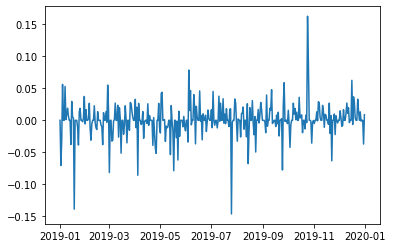

In [11]:
from data import set_datetime, detrend_ts, take_diff_ts

companyValuesSubMetrics2019['log_close_value'] = np.log(companyValuesSubMetrics2019['close_value'])

companyValuesSubMetrics2019 = take_diff_ts(data=companyValuesSubMetrics2019, \
    ts_column='log_close_value', lag_column='lag_log_close_value', lag=1, final_ts_len=365)

plt.plot(companyValuesSubMetrics2019.lag_log_close_value)

(array([  2.,   1.,   8.,  28., 227.,  83.,  13.,   2.,   0.,   1.]),
 array([-0.14634122, -0.11543636, -0.0845315 , -0.05362664, -0.02272178,
         0.00818308,  0.03908794,  0.0699928 ,  0.10089766,  0.13180252,
         0.16270738]),
 <BarContainer object of 10 artists>)

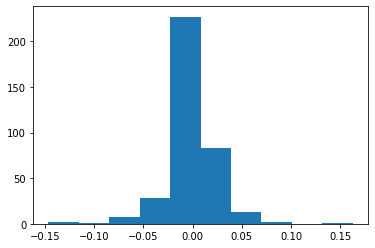

In [12]:
plt.hist(companyValuesSubMetrics2019.lag_log_close_value)

In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(companyValuesSubMetrics2019.lag_log_close_value)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -18.635766
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


In [14]:
dataFrame = np.column_stack((companyValuesSubMetrics2019.lag_log_close_value,
                    tweetSubMetrics2019.log_retweet_num,
                    tweetSubMetrics2019.detrended_log_comment_num))
dataFrame[:5]

array([[ 0.        ,  6.61204103, -0.54695628],
       [-0.07058239,  7.12849595, -0.07861812],
       [-0.03197756,  7.31388683,  0.14831061],
       [ 0.05609431,  6.87005341, -0.38452907],
       [ 0.        ,  6.67708346, -0.51965665]])

Text(0, 0.5, 'log_retweet_num')

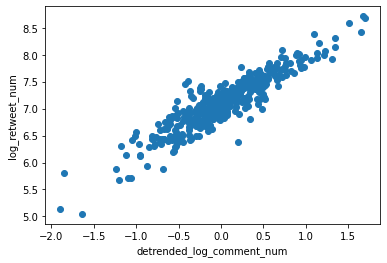

In [15]:
plt.scatter(dataFrame[:, 2], dataFrame[:, 1])
plt.xlabel("detrended_log_comment_num")
plt.ylabel("log_retweet_num")

### Causal Discovery - Constrained based

#### PC

In [21]:
from pytrad.search.ConstraintBased import PC
from pytrad.utils.cit import fisherz, chisq, gsq, mv_fisherz, kci ## Conditional Independence test

cg = PC.pc(data=dataFrame, alpha=0.05, indep_test=fisherz, stable=False, uc_rule=0, uc_priority=-1)

0 ind 1 | () with p-value 0.169218

0 ind 2 | () with p-value 0.076545



In [22]:
from pytrad.search.ConstraintBased import PC
from pytrad.utils.cit import fisherz, chisq, gsq, mv_fisherz, kci ## Conditional Independence test

cg = PC.pc(data=dataFrame, alpha=0.05, indep_test=fisherz, 
            stable=True, uc_rule=0, uc_priority=-1)

0 ind 1 | () with p-value 0.169218

0 ind 2 | () with p-value 0.076545

1 ind 0 | () with p-value 0.169218

2 ind 0 | () with p-value 0.076545



#### FCI

In [ ]:
from pytrad.search.ConstraintBased.FCI import fci, mod_endpoint
from pytrad.utils.GraphUtils import GraphUtils

G = fci(dataFrame, fisherz, 0.05, verbose=True)

pgv_g = GraphUtils.to_pgv(G)
pgv_g.draw('./FCI/tsla_test.jpeg', prog='dot', format='jpeg')

phase1 remove X1 --- X2 by sepset ('X3',) pval:0.7557804754878925


## All Companies Analysis

#### Tweet data preprocessing

In [24]:
from data import set_datetime, detrend_ts

tweet['date'] = set_datetime(tweet.post_date)

tweetMetrics = tweet[['ticker_symbol', 'date', 'comment_num', 'retweet_num', 'like_num']]
tweetMetrics = tweetMetrics.groupby(["ticker_symbol", "date"]).sum().reset_index()
tweetMetrics = tweetMetrics.pivot(index='date', columns=['ticker_symbol'])
tweetMetrics.columns = ["_".join(col) for col in tweetMetrics.columns]
tweetMetrics2019 = tweetMetrics[(tweetMetrics.index >= pd.to_datetime("2018/12/25")) \
    & (tweetMetrics.index <= pd.to_datetime("2019/12/31"))]

tweetMetrics2019.head(3)

,comment_num_AAPL,comment_num_AMZN,comment_num_GOOG,comment_num_GOOGL,comment_num_MSFT,comment_num_TSLA,retweet_num_AAPL,retweet_num_AMZN,retweet_num_GOOG,retweet_num_GOOGL,retweet_num_MSFT,retweet_num_TSLA,like_num_AAPL,like_num_AMZN,like_num_GOOG,like_num_GOOGL,like_num_MSFT,like_num_TSLA
date,,,,,,,,,,,,,,,,,,
2018-12-25,108,62,7,16,13,432,214,118,4,49,15,354,906,531,43,168,92,3395
2018-12-26,79,231,21,68,41,602,210,432,56,51,57,815,537,1679,122,381,231,5048
2018-12-27,118,184,8,78,33,778,190,235,16,108,42,709,713,1388,40,438,173,5513


In [25]:
for col in tweetMetrics2019.columns:
    print(f"Processing {col}")
    if sum(tweetMetrics2019[col] == 0) > 0:
        tweetMetrics2019[f'sqrt_{col}'] = np.sqrt(tweetMetrics2019[col])
        tweetMetrics2019[f'detrended_sqrt_{col}'] = detrend_ts(tweetMetrics2019[f'sqrt_{col}'])
    else:
        tweetMetrics2019[f'log_{col}'] = np.log(tweetMetrics2019[col])
        tweetMetrics2019[f'detrended_log_{col}'] = detrend_ts(tweetMetrics2019[f'log_{col}'])

tweetMetrics2019 = tweetMetrics2019[-365:]

Processing comment_num_AAPL
Processing comment_num_AMZN
Processing comment_num_GOOG
Processing comment_num_GOOGL
Processing comment_num_MSFT
Processing comment_num_TSLA
Processing retweet_num_AAPL
Processing retweet_num_AMZN
Processing retweet_num_GOOG
Processing retweet_num_GOOGL
Processing retweet_num_MSFT
Processing retweet_num_TSLA
Processing like_num_AAPL
Processing like_num_AMZN
Processing like_num_GOOG
Processing like_num_GOOGL
Processing like_num_MSFT
Processing like_num_TSLA


C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [26]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import zivot_andrews

stationary_cols = []

for col in tweetMetrics2019.columns:
    adf_result = adfuller(tweetMetrics2019[col])
    print(f'{col.upper()} test:')
    print(f'ADF Statistic: {adf_result[0]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('p-value: %f' % adf_result[1])
    print("Non-Stationary") if adf_result[1] > 0.05 else print("Stationary")
    
    # t_stat, p_value, critical_values, _, _ = zivot_andrews(stationary_with_break[0].values)
    za_result = zivot_andrews(tweetMetrics2019[col])
    print(f'Zivot-Andrews Statistic: {za_result[0]:.2f}')
    for key, value in za_result[2].items():
        print('Critial Values:')
        print(f'   {key}, {value:.2f}')
    print(f'\np-value: {za_result[1]:.2f}')
    print("Non-Stationary") if za_result[1] > 0.05 else print("Stationary")

    if (adf_result[1] < 0.05) & (za_result[1] < 0.05):
        stationary_cols.append(col)

len(stationary_cols)

COMMENT_NUM_AAPL test:
ADF Statistic: -14.938642879095237
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
p-value: 0.000000
Stationary
Zivot-Andrews Statistic: -15.41
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
COMMENT_NUM_AMZN test:
ADF Statistic: -13.972878362422568
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
p-value: 0.000000
Stationary
Zivot-Andrews Statistic: -14.75
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
COMMENT_NUM_GOOG test:
ADF Statistic: -13.229251578608718
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
p-value: 0.000000
Stationary
Zivot-Andrews Statistic: -13.64
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
COMMENT_NUM_GOOGL test:
ADF Statistic: -13.87193425963207
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
p-value: 0.000000
Stationar

44

In [27]:
stationary_cols[6:12]

['retweet_num_AAPL',
 'retweet_num_AMZN',
 'retweet_num_GOOG',
 'retweet_num_GOOGL',
 'retweet_num_MSFT',
 'retweet_num_TSLA']

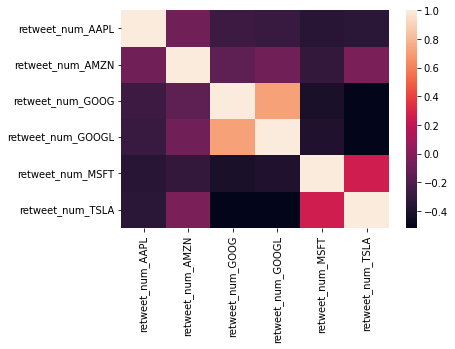

In [28]:
import seaborn as sn

# Correlation between Stationary variables
corrMatrix = tweetMetrics2019[stationary_cols[6:12]].corr().corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()


In [29]:
abs(corrMatrix[:]) > 0.75

,retweet_num_AAPL,retweet_num_AMZN,retweet_num_GOOG,retweet_num_GOOGL,retweet_num_MSFT,retweet_num_TSLA
retweet_num_AAPL,True,False,False,False,False,False
retweet_num_AMZN,False,True,False,False,False,False
retweet_num_GOOG,False,False,True,False,False,False
retweet_num_GOOGL,False,False,False,True,False,False
retweet_num_MSFT,False,False,False,False,True,False
retweet_num_TSLA,False,False,False,False,False,True


In [30]:
tweetMetricsFinal = tweetMetrics2019[stationary_cols[6:12]]

tweetMetricsFinal.head(3)

,retweet_num_AAPL,retweet_num_AMZN,retweet_num_GOOG,retweet_num_GOOGL,retweet_num_MSFT,retweet_num_TSLA
date,,,,,,
2019-01-01,163,208,8,45,74,744
2019-01-02,9,260,16,50,40,1247
2019-01-03,5215,405,55,153,94,1501


#### Value data preprocessing

In [31]:
companyValues['date'] = pd.to_datetime(companyValues['day_date']).dt.date
companyValuesMetrics = companyValues[['ticker_symbol', 'date', 'close_value', 'volume', 'open_value', 'high_value', 'low_value']]
companyValuesMetrics = companyValuesMetrics.groupby(["ticker_symbol", 'date']).sum().reset_index()
companyValuesMetrics = companyValuesMetrics.pivot(index='date', columns=['ticker_symbol'])
companyValuesMetrics.columns = ["_".join(col) for col in companyValuesMetrics.columns]
companyValuesMetrics2019 = companyValuesMetrics[(companyValuesMetrics.index >= pd.to_datetime("2018/12/25")) \
    & (companyValuesMetrics.index <= pd.to_datetime("2019/12/31"))]

companyValuesMetrics2019.head(3)

,close_value_AAPL,close_value_AMZN,close_value_GOOG,close_value_GOOGL,close_value_MSFT,close_value_TSLA,volume_AAPL,volume_AMZN,volume_GOOG,volume_GOOGL,...,high_value_GOOG,high_value_GOOGL,high_value_MSFT,high_value_TSLA,low_value_AAPL,low_value_AMZN,low_value_GOOG,low_value_GOOGL,low_value_MSFT,low_value_TSLA
date,,,,,,,,,,,,,,,,,,,,,
2018-12-25,146.83,1343.96,976.22,984.67,94.13,295.39,37169230.0,7219996.0,1590328.0,1817955.0,...,1003.54,1012.1195,97.97,314.5000,146.59,1307.00,970.11,977.6599,93.98,295.195
2018-12-26,157.17,1470.90,1039.46,1047.85,100.56,326.09,58133850.0,10332870.0,2337212.0,2306710.0,...,1040.00,1048.4500,100.69,326.9700,146.72,1363.01,983.00,992.6450,93.96,294.090
2018-12-27,156.15,1461.64,1043.88,1052.90,101.18,316.13,51608850.0,9631228.0,2102069.0,2265984.0,...,1043.89,1053.3400,101.19,322.1717,150.07,1390.31,997.00,1007.0000,96.40,301.500


In [32]:
companyValuesMetrics2019.columns[:6]

Index(['close_value_AAPL', 'close_value_AMZN', 'close_value_GOOG',
       'close_value_GOOGL', 'close_value_MSFT', 'close_value_TSLA'],
      dtype='object')

C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

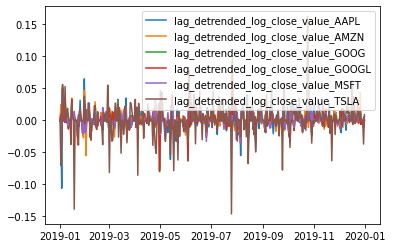

In [33]:
from data import set_datetime, detrend_ts, take_diff_ts

companyCloseValuesMetrics2019 = companyValuesMetrics2019[companyValuesMetrics2019.columns[:6]]

for col in companyCloseValuesMetrics2019.columns:
    companyCloseValuesMetrics2019[f'log_{col}'] = np.log(companyCloseValuesMetrics2019[col])
for col in companyCloseValuesMetrics2019.columns:
    companyCloseValuesMetrics2019[f'detrended_{col}'] = detrend_ts(companyCloseValuesMetrics2019[f'{col}'])

# Take differencing
lag = 1
final_ts_len = 365
temp_lag = {}
for col in companyCloseValuesMetrics2019.columns:
    temp = np.diff(companyCloseValuesMetrics2019[col], n=lag)
    temp_lag[f"lag_{col}"] = temp
companyCloseValuesMetrics2019 = companyCloseValuesMetrics2019[-final_ts_len:]
for col in companyCloseValuesMetrics2019.columns:
    companyCloseValuesMetrics2019[f"lag_{col}"] = temp_lag[f"lag_{col}"][-final_ts_len:]

for col in companyCloseValuesMetrics2019.columns[-6:]:
    plt.plot(companyCloseValuesMetrics2019[f'{col}'], label=f'{col}')
plt.legend()

In [34]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import zivot_andrews

stationary_cols = []

for col in companyCloseValuesMetrics2019.columns:
    adf_result = adfuller(companyCloseValuesMetrics2019[col])
    print(f'{col.upper()} test:')
    print(f'ADF Statistic: {adf_result[0]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('p-value: %f' % adf_result[1])
    print("Non-Stationary") if adf_result[1] > 0.05 else print("Stationary")
    
    # t_stat, p_value, critical_values, _, _ = zivot_andrews(stationary_with_break[0].values)
    za_result = zivot_andrews(companyCloseValuesMetrics2019[col])
    print(f'Zivot-Andrews Statistic: {za_result[0]:.2f}')
    for key, value in za_result[2].items():
        print('Critial Values:')
        print(f'   {key}, {value:.2f}')
    print(f'\np-value: {za_result[1]:.2f}')
    print("Non-Stationary") if za_result[1] > 0.05 else print("Stationary")

    if (adf_result[1] < 0.05) & (za_result[1] < 0.05):
        stationary_cols.append(col)

len(stationary_cols)

CLOSE_VALUE_AAPL test:
ADF Statistic: 0.5209583561479497
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
p-value: 0.985496
Non-Stationary
Zivot-Andrews Statistic: -4.48
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.13
Non-Stationary
CLOSE_VALUE_AMZN test:
ADF Statistic: -2.9377897919336324
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
p-value: 0.041127
Stationary
Zivot-Andrews Statistic: -4.45
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.14
Non-Stationary
CLOSE_VALUE_GOOG test:
ADF Statistic: -1.7502700301471519
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
p-value: 0.405415
Non-Stationary
Zivot-Andrews Statistic: -6.14
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
CLOSE_VALUE_GOOGL test:
ADF Statistic: -1.729075688233859
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
p-value: 0.4161

26

In [35]:
stationary_cols[2:8]

['lag_close_value_AAPL',
 'lag_close_value_AMZN',
 'lag_close_value_GOOG',
 'lag_close_value_GOOGL',
 'lag_close_value_MSFT',
 'lag_close_value_TSLA']

In [36]:
companyCloseValuesMetricsFinal = companyCloseValuesMetrics2019[stationary_cols[2:8]]

companyCloseValuesMetricsFinal.head(3)

,lag_close_value_AAPL,lag_close_value_AMZN,lag_close_value_GOOG,lag_close_value_GOOGL,lag_close_value_MSFT,lag_close_value_TSLA
date,,,,,,
2019-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-02,0.003495,0.092827,0.036487,0.035126,-0.017852,-0.165929
2019-01-03,-0.305460,-0.097049,-0.106148,-0.105559,-0.147572,-0.071405


### Causal Discovery - Constrained based

In [45]:
dataFrameCompanies = np.column_stack((
    companyCloseValuesMetricsFinal,
    tweetMetricsFinal))
dataFrameCompanies[:5].shape

(5, 12)

In [48]:
print(f"Columns for values: \n{companyCloseValuesMetricsFinal.columns}")
print(f"Columns for tweets: \n{tweetMetricsFinal.columns}")

Columns for values: 
Index(['lag_close_value_AAPL', 'lag_close_value_AMZN', 'lag_close_value_GOOG',
       'lag_close_value_GOOGL', 'lag_close_value_MSFT',
       'lag_close_value_TSLA'],
      dtype='object')
Columns for tweets: 
Index(['retweet_num_AAPL', 'retweet_num_AMZN', 'retweet_num_GOOG',
       'retweet_num_GOOGL', 'retweet_num_MSFT', 'retweet_num_TSLA'],
      dtype='object')


#### PC

In [41]:
from pytrad.search.ConstraintBased import PC
from pytrad.utils.cit import fisherz, chisq, gsq, mv_fisherz, kci ## Conditional Independence test

cg = PC.pc(data=dataFrameCompanies, alpha=0.05, indep_test=fisherz, 
            stable=True, uc_rule=0, uc_priority=-1)

0 ind 6 | () with p-value 0.185778

0 ind 7 | () with p-value 0.340791

0 ind 8 | () with p-value 0.302327

0 ind 9 | () with p-value 0.371971

0 ind 10 | () with p-value 0.336607

0 ind 11 | () with p-value 0.112120

1 ind 6 | () with p-value 0.432933

1 ind 7 | () with p-value 0.491775

1 ind 8 | () with p-value 0.063948

1 ind 10 | () with p-value 0.472353

2 ind 7 | () with p-value 0.360558

2 ind 9 | () with p-value 0.184298

2 ind 10 | () with p-value 0.199693

3 ind 7 | () with p-value 0.385453

3 ind 9 | () with p-value 0.147322

3 ind 10 | () with p-value 0.216042

4 ind 6 | () with p-value 0.270927

4 ind 8 | () with p-value 0.452547

4 ind 9 | () with p-value 0.426067

5 ind 6 | () with p-value 0.288357

5 ind 7 | () with p-value 0.067595

5 ind 8 | () with p-value 0.143510

5 ind 9 | () with p-value 0.076506

5 ind 10 | () with p-value 0.326424

5 ind 11 | () with p-value 0.059650

6 ind 0 | () with p-value 0.185778

6 ind 1 | () with p-value 0.432933

6 ind 4 | () with p-v

#### FCI

In [43]:
from pytrad.search.ConstraintBased.FCI import fci, mod_endpoint
from pytrad.utils.GraphUtils import GraphUtils

G = fci(dataFrameCompanies, fisherz, 0.05, verbose=True)

pgv_g = GraphUtils.to_pgv(G)
pgv_g.draw('./FCI/all_companies_test.jpeg', prog='dot', format='jpeg')

phase1 remove X1 --- X7 by sepset () pval:0.18577785012303716
phase1 remove X1 --- X8 by sepset () pval:0.34079108582854933
phase1 remove X1 --- X9 by sepset () pval:0.3023271653343915
phase1 remove X1 --- X10 by sepset () pval:0.37197075374287114
phase1 remove X1 --- X11 by sepset () pval:0.3366069376574261
phase1 remove X1 --- X12 by sepset () pval:0.11211984443261769
phase1 remove X2 --- X7 by sepset () pval:0.4329329518936985
phase1 remove X2 --- X8 by sepset () pval:0.4917745269144146
phase1 remove X2 --- X9 by sepset () pval:0.06394750492232504
phase1 remove X2 --- X11 by sepset () pval:0.4723530117441803
phase1 remove X3 --- X8 by sepset () pval:0.3605576944078639
phase1 remove X3 --- X10 by sepset () pval:0.18429770835830184
phase1 remove X3 --- X11 by sepset () pval:0.19969344777313158
phase1 remove X4 --- X8 by sepset () pval:0.38545321583333236
phase1 remove X4 --- X10 by sepset () pval:0.1473221359617103
phase1 remove X4 --- X11 by sepset () pval:0.21604165539781617
phase1 

Implemented by Diego Saenz